<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#AB-Testing" data-toc-modified-id="AB-Testing-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>AB-Testing</a></span></li></ul></div>

# AB-Testing

![cats](images/cats.jpeg)


Imaginad que somos los cientificos de datos de la empresa de videojuegos Tactile Entertainment. Los desarrolladores del juego Cookie Cats pretenden introducir un cambio en el juego para aumentar la retencion de los jugadores. En cierto nivel del juego los jugadores se encuentran una puerta que les obliga a esperar o a pagar la app. Actualmente la puerta se encuentra en nivel 30 y se pretende pasar al nivel 40, para comprobar la retencion a 1 y 7 dias. Antes de realizar el cambio definitivo en el juego se raliza un test AB.

Los datos estan alojados en `data/cookie_cats.csv`. Nuestro grupo de control sera la version actual `gate_30` y el grupo de tratamiento sera la version `gate_40`. Debemos realizar el test para 1 dia de retencion `retention_1` y para 7 dias `retention_7`.

In [1]:
# librerias
import pandas as pd

from scipy.stats import beta

from bayes import *

In [2]:
# datos
data=pd.read_csv('data/cookie_cats.csv')

data.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [3]:
# transformacion

data.version=np.where(data.version=='gate_30', 'A', 'B')

data.retention_1=np.where(data.retention_1==True, 1, 0)
data.retention_7=np.where(data.retention_7==True, 1, 0)

data.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,A,3,0,0
1,337,A,38,1,0
2,377,B,165,1,0
3,483,B,1,0,0
4,488,B,179,1,1


In [4]:
# muestreo
control=data[data.version=='A'].sample(n=44000, random_state=42)

tratamiento=data[data.version=='B'].sample(n=44000, random_state=42)

ab_test=pd.concat([control, tratamiento], axis=0)

ab_test.reset_index(drop=True, inplace=True)

ab_test.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,6531033,A,35,0,0
1,8003009,A,4,0,0
2,5566807,A,23,1,0
3,64235,A,1,0,0
4,6210551,A,7,0,0


In [5]:
# testeo para retention_1

# los datos son conocidos: impresiones, conversiones, control y test
imps_ctrl, convs_ctrl= len(control), sum(control.retention_1)
imps_test, convs_test= len(tratamiento), sum(tratamiento.retention_1)

CR_ctrl=convs_ctrl/imps_ctrl
CR_test=convs_test/imps_test

print ('Tasas', CR_ctrl, CR_test)

Tasas 0.4484318181818182 0.44279545454545455


In [6]:
# se crean funciones beta
# aprioris

a_C, b_C = convs_ctrl+1, imps_ctrl-convs_ctrl+1
a_T, b_T = convs_test+1, imps_test-convs_test+1

beta_C=beta(a_C, b_C)  # control
beta_T=beta(a_T, b_T)  # test

In [7]:
# diferencia normalizada de las medias de test y control

salto=(beta_T.mean()-beta_C.mean())/beta_C.mean()

In [8]:
prob=calc_prob(beta_T, beta_C)  # esta funcion es la clave

El test aumenta la tasa de conversion en un -1.26%,
con una probabilidad del 4.63%
0.4484318181818182 0.44279545454545455


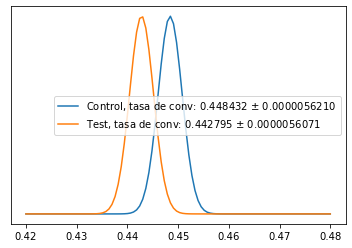

In [9]:
print (
'''El test aumenta la tasa de conversion en un {:2.2f}%,
con una probabilidad del {:2.2f}%'''
    .format(salto*100, prob*100)
)

print (CR_ctrl, CR_test)
plot([beta_C, beta_T], ['Control', 'Test'], linf=0.42, lsup=0.48)

In [10]:
# En este caso esta al reves, 
# por tanto el test disminuye la tasa de conversion 
#en un 1.26%,con una probabilidad del 95.37%

In [11]:
# testeo para retention_7

# los datos son conocidos: impresiones, conversiones, control y test
imps_ctrl, convs_ctrl= len(control), sum(control.retention_7)
imps_test, convs_test= len(tratamiento), sum(tratamiento.retention_7)

CR_ctrl=convs_ctrl/imps_ctrl
CR_test=convs_test/imps_test

print ('Tasas', CR_ctrl, CR_test)

Tasas 0.19011363636363637 0.18220454545454545


In [12]:
# se crean funciones beta
# aprioris

a_C, b_C = convs_ctrl+1, imps_ctrl-convs_ctrl+1
a_T, b_T = convs_test+1, imps_test-convs_test+1

beta_C=beta(a_C, b_C)  # control
beta_T=beta(a_T, b_T)  # test

In [13]:
# diferencia normalizada de las medias de test y control

salto=(beta_T.mean()-beta_C.mean())/beta_C.mean()

In [14]:
prob=calc_prob(beta_T, beta_C)  # esta funcion es la clave

El test aumenta la tasa de conversion en un -4.16%,
con una probabilidad del 0.13%
0.19011363636363637 0.18220454545454545


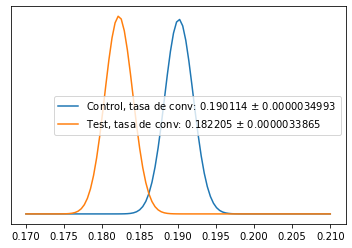

In [15]:
print (
'''El test aumenta la tasa de conversion en un {:2.2f}%,
con una probabilidad del {:2.2f}%'''
    .format(salto*100, prob*100)
)

print (CR_ctrl, CR_test)
plot([beta_C, beta_T], ['Control', 'Test'], linf=0.17, lsup=0.21)

In [16]:
# En este caso, igual que antes, esta al reves, 
# por tanto el test disminuye la tasa de conversion 
# en un 4.16%,con una probabilidad del 99.87%